In [1]:
from matplotlib import style
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')
sns.set(style="darkgrid", palette="bright", font_scale = 1.5)
df = pd.read_csv("StudentsPerformance.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None


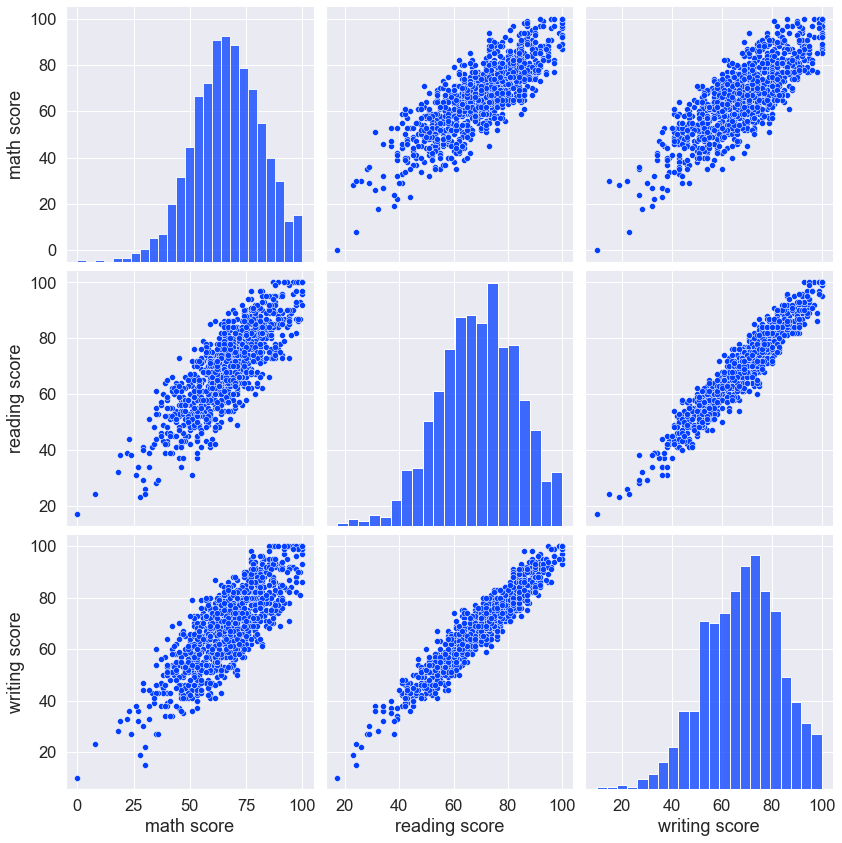

In [2]:
sns.pairplot(df[['math score', 'reading score','writing score']], height=4)

In [3]:
def average_score(dt):
    return (dt['math score'] + dt['reading score'] + dt['writing score'])/3

df['average_score'] = df.apply(average_score, axis=1)

Text(0.5, 1.0, 'writing')

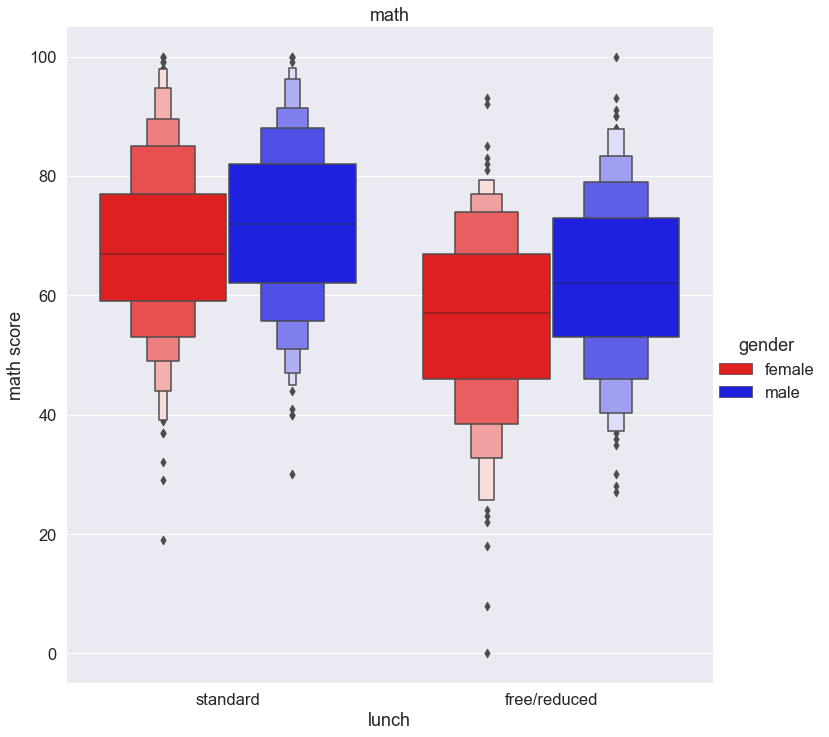

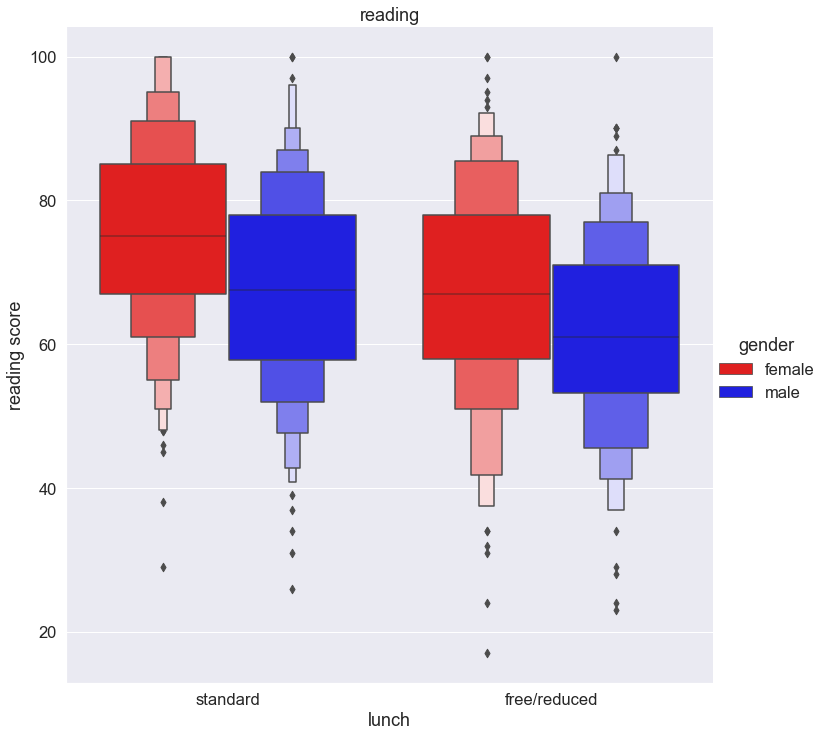

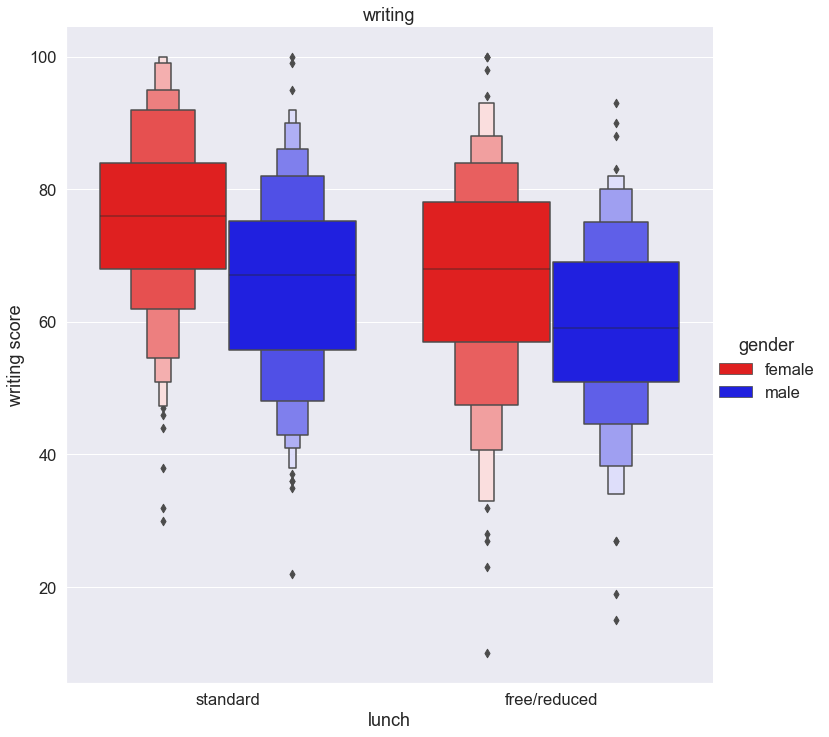

In [4]:
sns.catplot(x = 'lunch', y='math score', hue='gender', kind='boxen', data = df, height =10, palette=sns.color_palette(['red','blue']))
plt.title('math')

sns.catplot(x = 'lunch', y='reading score', hue='gender', kind='boxen', data = df, height =10, palette=sns.color_palette(['red','blue']))
plt.title('reading')

sns.catplot(x = 'lunch', y='writing score', hue='gender', kind='boxen', data = df, height =10, palette=sns.color_palette(['red','blue']))
plt.title('writing')



Text(0.5, 1.0, 'average')

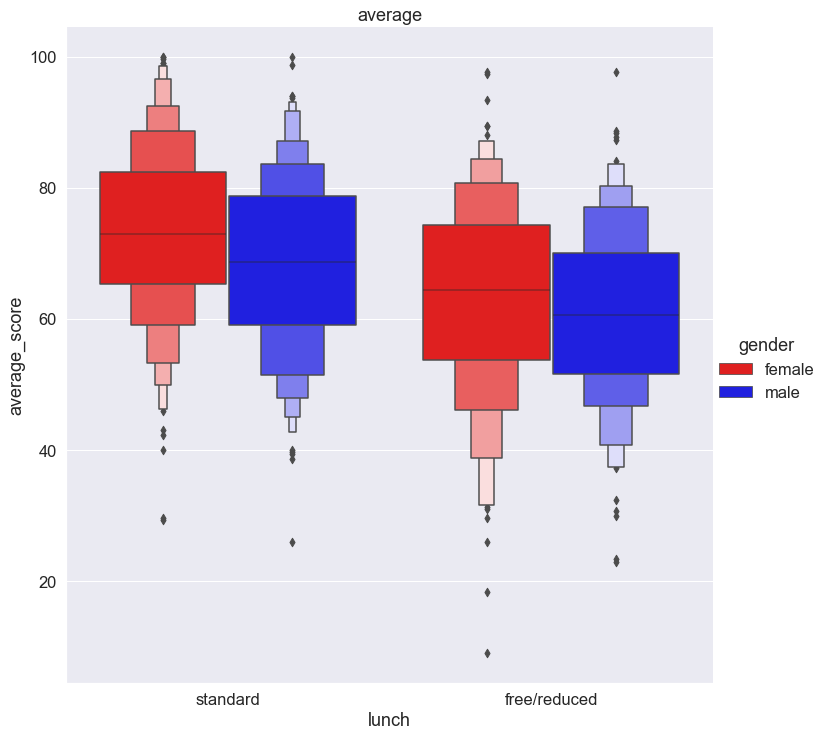

In [5]:
sns.catplot(x = 'lunch', y='average_score', hue='gender', kind='boxen', data = df, height =10, palette=sns.color_palette(['red','blue']))
plt.title('average')

No handles with labels found to put in legend.


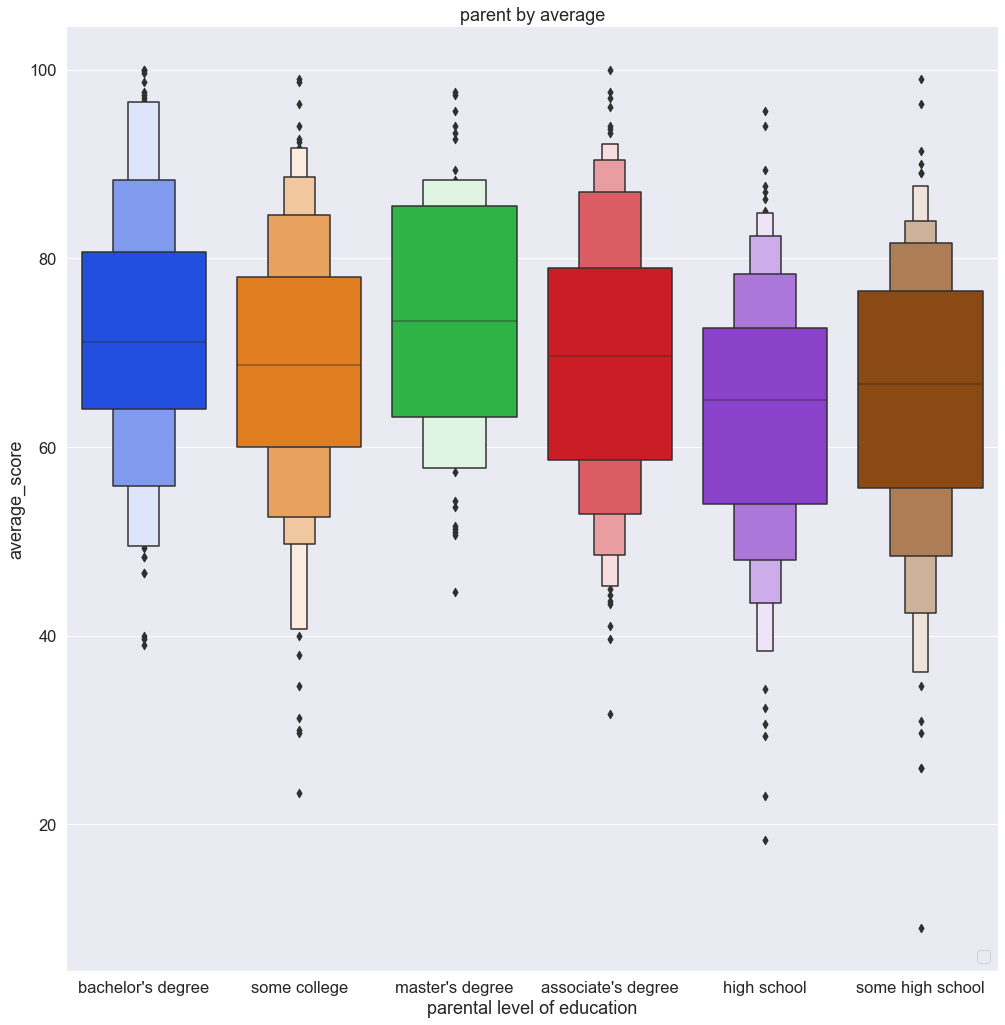

In [6]:
sns.catplot(x='parental level of education', y='average_score', kind= 'boxen', data=df, height=14)
plt.title('parent by average')
plt.legend(loc='lower right')


In [7]:
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [8]:
def user_drop(df):
    df.drop(['race/ethnicity','test preparation course'], axis=1,inplace=True)
    return df

def user_format_features(df):
    features = ['gender', 'parental level of education','lunch']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
        
        # le = le.transform(df[feature])

        # le = le.reshape(-1,1)

        # oh_encoder = preprocessing.OneHotEncoder()
        # oh_encoder.fit(le)
        # df[feature] = oh_encoder.transform(le)

    return df
def transform_features(df):
    # df = user_fillna(df)
    df = user_drop(df)
    df = user_format_features(df)
    return df

def average_score(dt):
    return (dt['math score'] + dt['reading score'] + dt['writing score'])/3

In [9]:
df = pd.read_csv('StudentsPerformance.csv')

df['average_score'] = df.apply(average_score, axis=1)


df =transform_features(df)
print(df)


     gender  parental level of education  lunch  math score  reading score  \
0         0                            1      1          72             72   
1         0                            4      1          69             90   
2         0                            3      1          90             95   
3         1                            0      0          47             57   
4         1                            4      1          76             78   
..      ...                          ...    ...         ...            ...   
995       0                            3      1          88             99   
996       1                            2      0          62             55   
997       0                            2      0          59             71   
998       0                            4      1          68             78   
999       0                            4      0          77             86   

     writing score  average_score  
0               74      72.

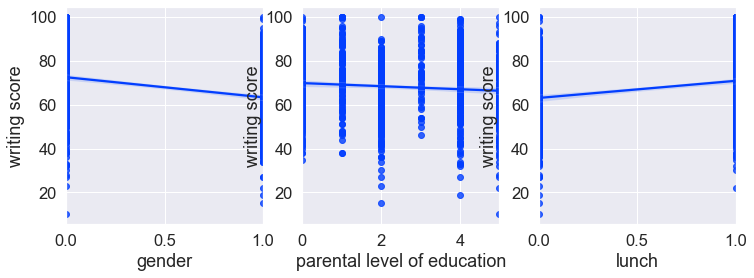

In [10]:
fig, axs = plt.subplots(figsize=(12,4), ncols=3, nrows =1)
lm_features = ['gender','parental level of education','lunch']
for i , feature in enumerate(lm_features):
    col = i%3
    sns.regplot(x = feature, y = 'writing score', data= df, ax = axs[col])

In [11]:


y_target = df['writing score']
X_data = df.drop(['writing score'], axis=1, inplace=False)

ridge = Ridge(alpha= 10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds의 개별 Negative MSE scores : ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 3))
print(' 5 folds 의 평균 RMSE : {:.3f}'.format(avg_rmse))



 5 folds의 개별 Negative MSE scores :  [-0.001 -0.002 -0.001 -0.001 -0.002]
 5 folds 의 개별 RMSE scores :  [0.035 0.04  0.035 0.033 0.039]
 5 folds 의 평균 RMSE : 0.036


In [12]:
# Ridge에 사용될 alpha 파라미터의 값들을 정의
alphas = [0 , 0.1 , 1 , 10 , 100]

# alphas list 값을 iteration하면서 alpha에 따른 평균 rmse 구함.
for alpha in alphas :
    ridge = Ridge(alpha = alpha)
    
    #cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f} '.format(alpha,avg_rmse))

alpha 0 일 때 5 folds 의 평균 RMSE : 0.000 
alpha 0.1 일 때 5 folds 의 평균 RMSE : 0.000 
alpha 1 일 때 5 folds 의 평균 RMSE : 0.004 
alpha 10 일 때 5 folds 의 평균 RMSE : 0.036 
alpha 100 일 때 5 folds 의 평균 RMSE : 0.315 


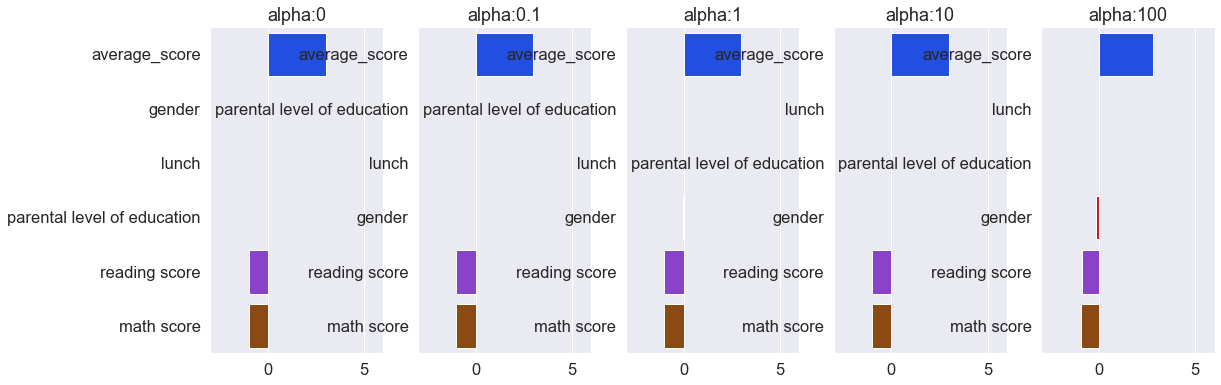

In [13]:
# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성  
fig , axs = plt.subplots(figsize=(18,6) , nrows=1 , ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성  
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos , alpha in enumerate(alphas) :
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data , y_target)
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.  
    coeff = pd.Series(data=ridge.coef_ , index=X_data.columns )
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])

# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()
